<a href="https://colab.research.google.com/github/abdipourasl/CNN---Scalogram/blob/main/first45_fullband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
os.chdir('/content/drive/My Drive/Pics - full - first45')
os.listdir('/content/drive/My Drive/Pics - full - first45')

['OCD', 'norm']

In [28]:
data_dir= '/content/drive/My Drive/Pics - full - first45'

In [29]:
os.listdir(os.path.join(data_dir,'OCD'))

['OCD_1.png',
 'OCD_3.png',
 'OCD_4.png',
 'OCD_2.png',
 'OCD_8.png',
 'OCD_9.png',
 'OCD_6.png',
 'OCD_7.png',
 'OCD_10.png',
 'OCD_5.png',
 'OCD_13.png',
 'OCD_14.png',
 'OCD_11.png',
 'OCD_12.png',
 'OCD_15.png',
 'OCD_18.png',
 'OCD_17.png',
 'OCD_20.png',
 'OCD_16.png',
 'OCD_19.png',
 'OCD_22.png',
 'OCD_24.png',
 'OCD_23.png',
 'OCD_21.png',
 'OCD_26.png',
 'OCD_25.png',
 'OCD_28.png',
 'OCD_31.png',
 'OCD_30.png',
 'OCD_29.png',
 'OCD_27.png',
 'OCD_36.png',
 'OCD_35.png',
 'OCD_37.png',
 'OCD_32.png',
 'OCD_34.png',
 'OCD_33.png',
 'OCD_38.png',
 'OCD_41.png',
 'OCD_39.png',
 'OCD_43.png',
 'OCD_40.png',
 'OCD_42.png',
 'OCD_45.png',
 'OCD_48.png',
 'OCD_46.png',
 'OCD_49.png',
 'OCD_44.png',
 'OCD_47.png',
 'OCD_52.png',
 'OCD_50.png',
 'OCD_55.png',
 'OCD_53.png',
 'OCD_51.png',
 'OCD_54.png',
 'OCD_60.png',
 'OCD_61.png',
 'OCD_56.png',
 'OCD_57.png',
 'OCD_59.png',
 'OCD_58.png',
 'OCD_65.png',
 'OCD_63.png',
 'OCD_66.png',
 'OCD_62.png',
 'OCD_64.png',
 'OCD_68.png',
 'OC

In [30]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [31]:
img=cv2.imread(os.path.join('/content/drive/My Drive/Pics - full - first45','OCD','OCD_855.png'))
img.shape


(271, 621, 3)

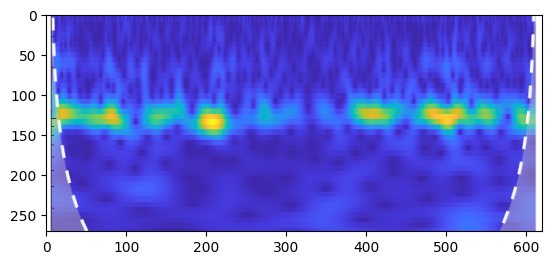

In [32]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [33]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [34]:
import numpy as np

In [35]:
#tf.data.Dataset??

In [36]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Pics - full - first45')

Found 1710 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [11]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
data_iterator= data.as_numpy_iterator()


In [38]:
batch=data_iterator.next()

In [15]:
batch[1]

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [16]:
batch[0].shape

(32, 256, 256, 3)

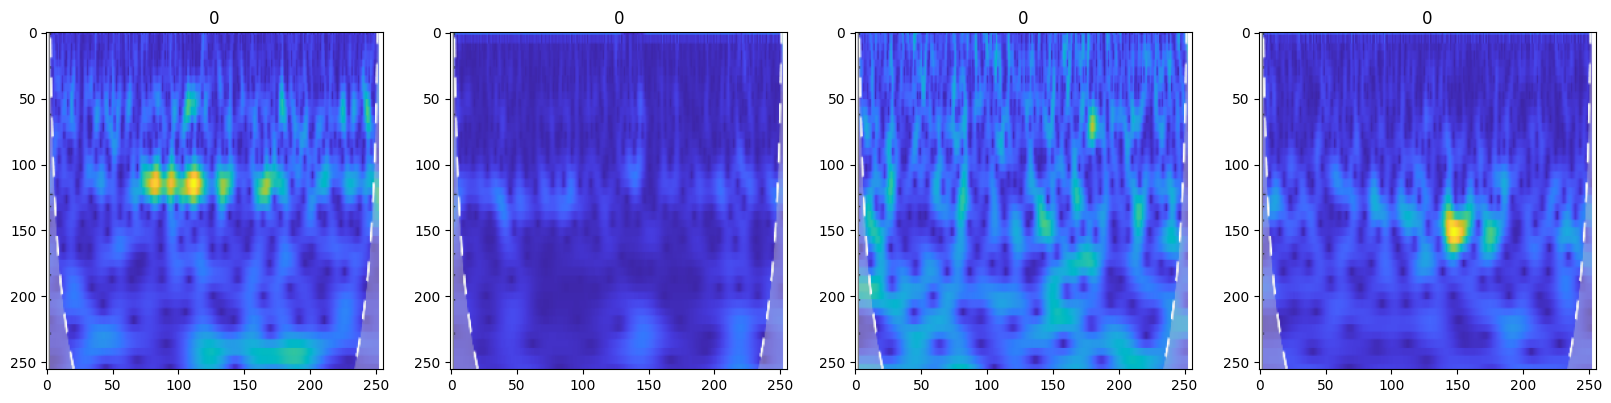

In [39]:
# 0 = norm
# 1 = OCD


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [40]:
data.as_numpy_iterator().next()

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [121.18945 , 125.54492 , 132.07812 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [121.30429 , 125.3918  , 132.07812 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [122.49609 , 123.802734, 132.07812 ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [41]:
data.as_numpy_iterator().next()[0].max()

255.0

In [42]:
data= data.map(lambda x,y:(x/255,y))

In [43]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.4786688 , 0.48720893, 0.5196615 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.47881895, 0.4869087 , 0.51951134],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.48037684, 0.4837929 , 0.51795346],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [44]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [ ]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [ ]:
len(data)

55

In [46]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


In [25]:
len(train)

37

# Deep Learning Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [50]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [52]:
logdir='logs'

In [53]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 100s 3s/step - loss: 0.7307 - accuracy: 0.5169 - val_loss: 0.6815 - val_accuracy: 0.5813
Epoch 2/20
37/37 [==============================] - 103s 3s/step - loss: 0.6400 - accuracy: 0.6326 - val_loss: 0.6005 - val_accuracy: 0.7094
Epoch 3/20
37/37 [==============================] - 103s 3s/step - loss: 0.5508 - accuracy: 0.7137 - val_loss: 0.5787 - val_accuracy: 0.6875
Epoch 4/20
37/37 [==============================] - 103s 3s/step - loss: 0.5255 - accuracy: 0.7610 - val_loss: 0.4790 - val_accuracy: 0.7781
Epoch 5/20
37/37 [==============================] - 104s 3s/step - loss: 0.4122 - accuracy: 0.8336 - val_loss: 0.4679 - val_accuracy: 0.7437
Epoch 6/20
37/37 [==============================] - 102s 3s/step - loss: 0.4052 - accuracy: 0.8226 - val_loss: 0.3704 - val_accuracy: 0.8344
Epoch 7/20
37/37 [==============================] - 101s 3s/step - loss: 0.2976 - accuracy: 0.8809 - val_loss: 0.3303 - val_accuracy: 0.8687
Epoch 8/20
37

In [55]:
hist.history

{'loss': [0.7306879758834839,
  0.6400050520896912,
  0.5508068203926086,
  0.5255394577980042,
  0.41223233938217163,
  0.40524187684059143,
  0.2976212203502655,
  0.2679722309112549,
  0.19742541015148163,
  0.15697214007377625,
  0.13623353838920593,
  0.09732447564601898,
  0.07791026681661606,
  0.05549631267786026,
  0.03432300686836243,
  0.03874052315950394,
  0.05515814572572708,
  0.050792396068573,
  0.044136885553598404,
  0.019623413681983948],
 'accuracy': [0.5168918967247009,
  0.6326013803482056,
  0.7136824131011963,
  0.7609797120094299,
  0.8336148858070374,
  0.8226351141929626,
  0.880912184715271,
  0.8918918967247009,
  0.9307432174682617,
  0.943412184715271,
  0.9493243098258972,
  0.9704391956329346,
  0.9704391956329346,
  0.9797297120094299,
  0.9881756901741028,
  0.9864864945411682,
  0.9847972989082336,
  0.9856418967247009,
  0.9847972989082336,
  0.9932432174682617],
 'val_loss': [0.6814910173416138,
  0.6005387306213379,
  0.5787423253059387,
  0.4789

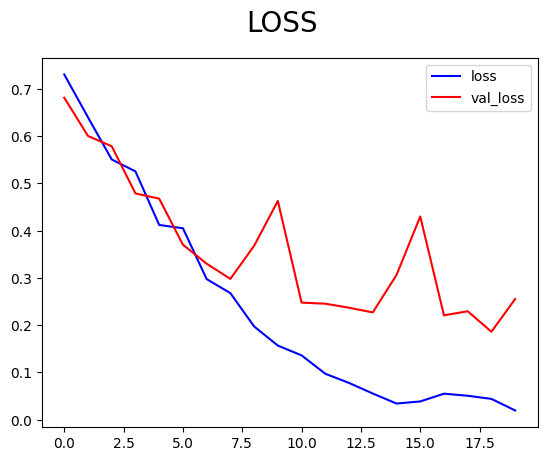

In [56]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

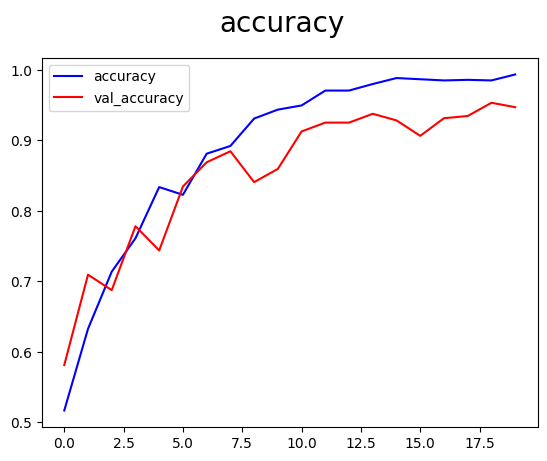

In [57]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [58]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [59]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 522ms/step


In [61]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 0.9285714030265808 Recall: 0.9629629850387573  Accuracy : 0.9437500238418579 
